# Mount Drive

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Lib and Dataset

In [179]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [180]:
df = pd.read_csv("/content/drive/MyDrive/Time Series/Data_set/GRAB.csv")

In [181]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [182]:
df['Date']

,Date
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-06
4,2021-12-07
...,...
610,2024-05-07
611,2024-05-08
612,2024-05-09
613,2024-05-10


In [183]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [184]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [185]:
origin_df = df
origin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


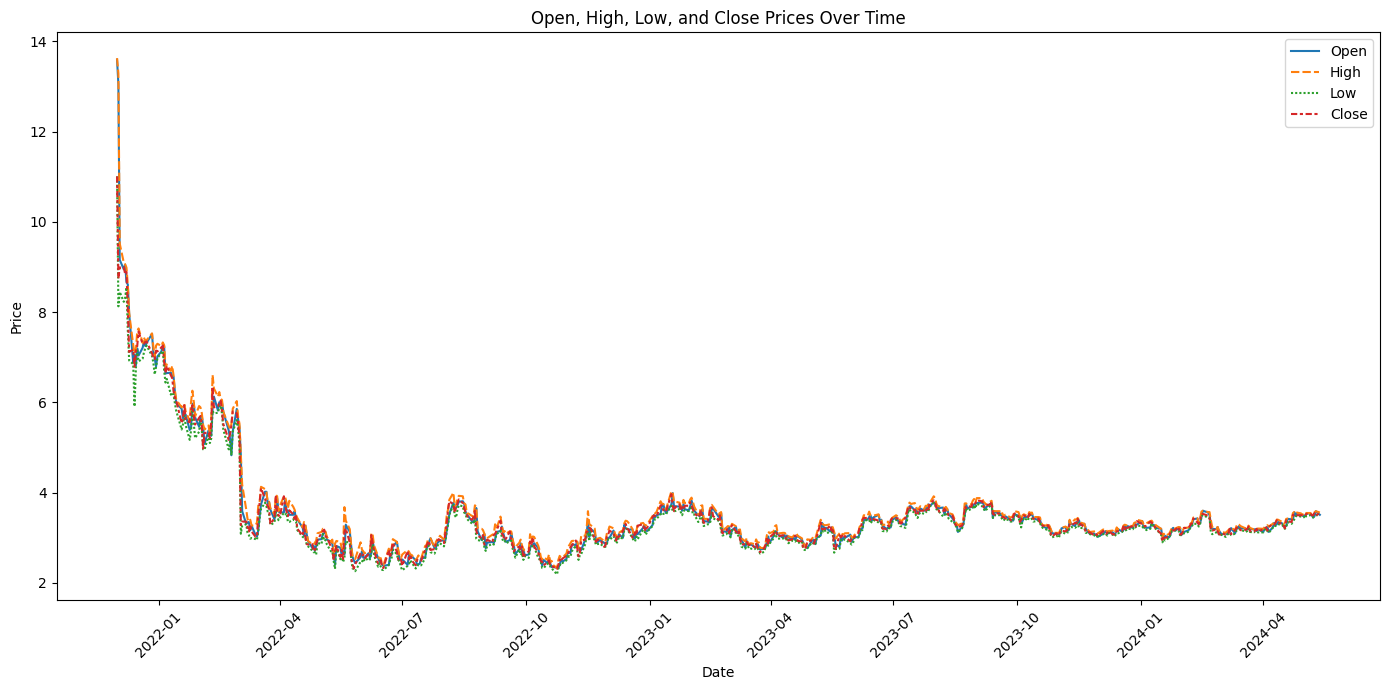

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Open, High, Low, and Close prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Open, High, Low, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

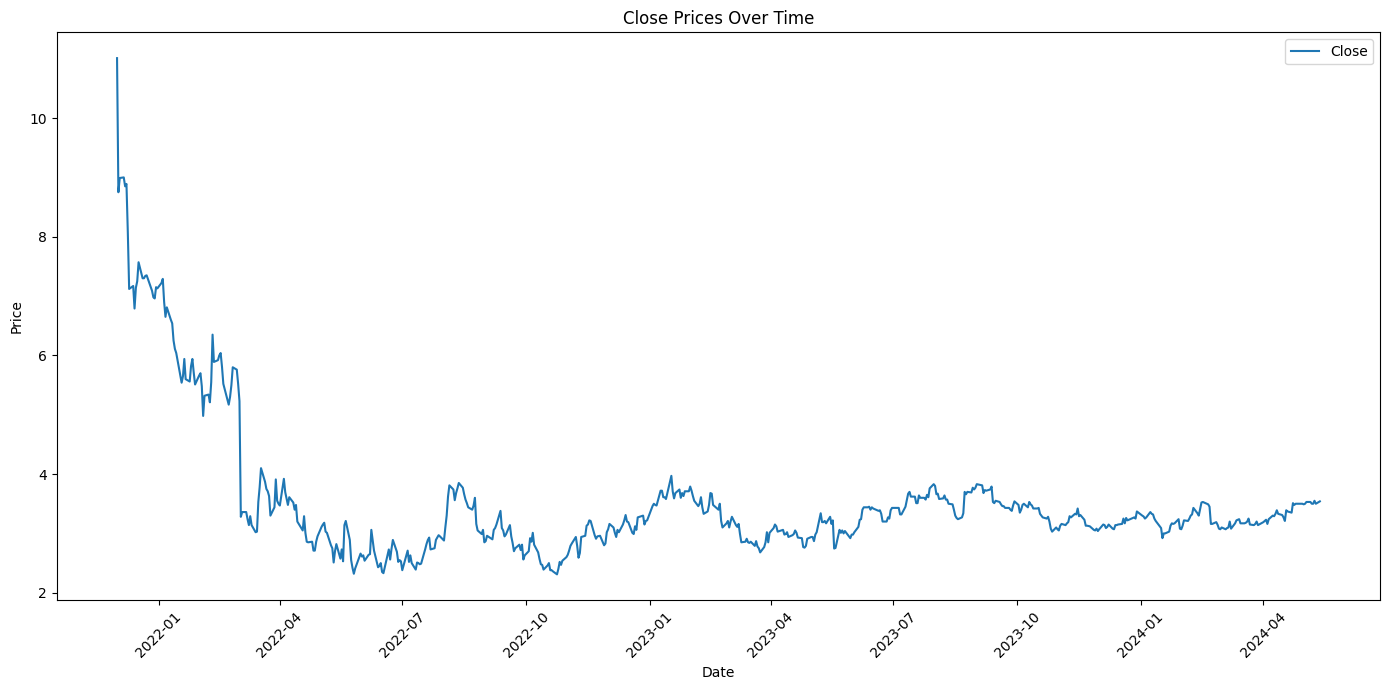

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Open, High, Low, and Close prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['Close']])
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Linear Interpolation (Rejected)

In [188]:
# import pandas as pd

# full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')

# df = df.reindex(full_index)

# df_interpolated = df.interpolate(method='linear')

# df_interpolated.reset_index(inplace=True)
# df_interpolated.rename(columns={'index': 'Date'}, inplace=True)

# # แสดงตัวอย่าง
# print(df_interpolated.head(10))


# Adfuller

In [189]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


ADF Statistic: -4.885534
p-value: 0.000037
Critical Values:


# Train-Test Split (Change Train/Test ratio here)

In [190]:
test_ratio = 0.2

train_size = int(len(df) * (1 - test_ratio))

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

Training data size: 492
Test data size: 123


In [191]:
test_data.index[0]

Timestamp('2023-11-15 00:00:00')

# Simple Exponential Smoothing

In [192]:
# Fit the SimpleExpSmoothing model on the training data
model_ses = SimpleExpSmoothing(train_data['Close'])
fit_model_ses = model_ses.fit()

predictions_ses = fit_model_ses.forecast(len(test_data))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [193]:
ses_model = SimpleExpSmoothing(train_data['Close']).fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Close   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                             21.886
Optimized:                       True   AIC                          -1527.425
Trend:                           None   BIC                          -1519.028
Seasonal:                        None   AICC                         -1527.343
Seasonal Periods:                None   Date:                 Fri, 01 Aug 2025
Box-Cox:                        False   Time:                         15:00:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              11.010000                

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [194]:
rmse_ses = np.sqrt(mean_squared_error(test_data["Close"], predictions_ses))
print(f"\nRMSE of ses: {rmse_ses}")

mae_ses = mean_absolute_error(test_data["Close"], predictions_ses)
print(f"MAE of ses: {mae_ses}")

mape_ses = mean_absolute_percentage_error(test_data["Close"], predictions_ses)*100
print(f"MAPE of ses: {mape_ses}%")


RMSE of ses: 0.16463682630303803
MAE of ses: 0.14308943096578614
MAPE of ses: 4.466947260811222%


In [195]:
ses_pred = fit_model_ses.forecast(len(test_data))
print('Simple Exponential Smoothing Predictions:')
ses_pred

Simple Exponential Smoothing Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.32
493,3.32
494,3.32
495,3.32
496,3.32
...,...
610,3.32
611,3.32
612,3.32
613,3.32


## RMSE, MAE และ MAPE of test data

In [196]:
# Calculate RMSE for the test set
rmse_ses = np.sqrt(mean_squared_error(test_data['Close'], ses_pred))
print("RMSE of SES:", rmse_ses)

RMSE of SES: 0.16463682630303803


In [197]:
# Calculate MAE for the test set
mae_ses = mean_absolute_error(test_data['Close'], ses_pred)
print("MAE of SES:", mae_ses)

MAE of SES: 0.14308943096578614


In [198]:
# Calculate MAPE for the test set
mape_ses = mean_absolute_percentage_error(test_data['Close'], ses_pred)
print("MAPE of SES:", mape_ses)
print(", " + str(mape_ses*100) + "%")

MAPE of SES: 0.044669472608112215
, 4.466947260811222%


In [199]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-15,3.330,3.440,3.33,3.42,3.42,19083800
2023-11-16,3.388,3.388,3.22,3.29,3.29,28915500
2023-11-17,3.280,3.340,3.22,3.31,3.31,19511100
2023-11-20,3.310,3.310,3.21,3.23,3.23,24865500
2023-11-21,3.200,3.210,3.11,3.13,3.13,22846200


### Predict and Actual Comparison Graph Display

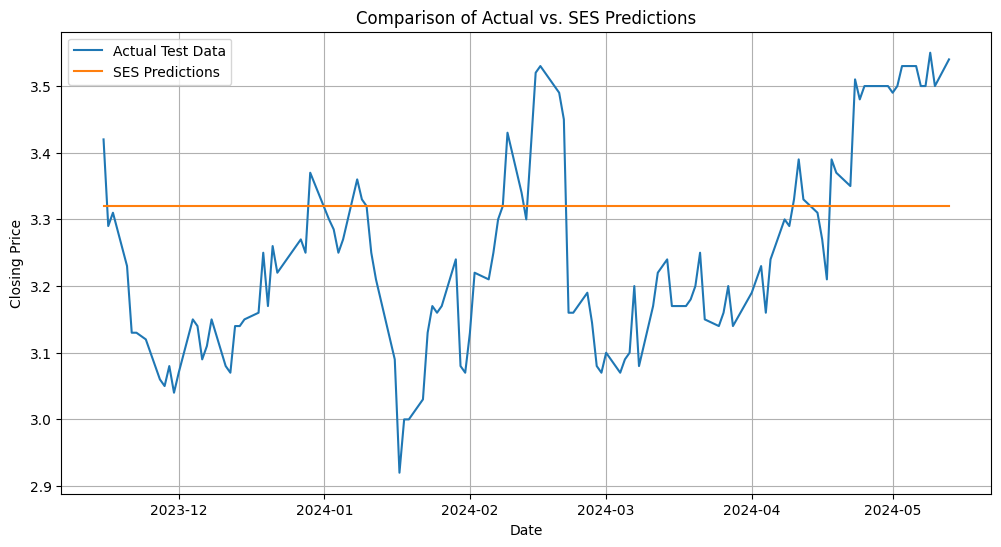

In [200]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, ses_pred, label='SES Predictions')
plt.title('Comparison of Actual vs. SES Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

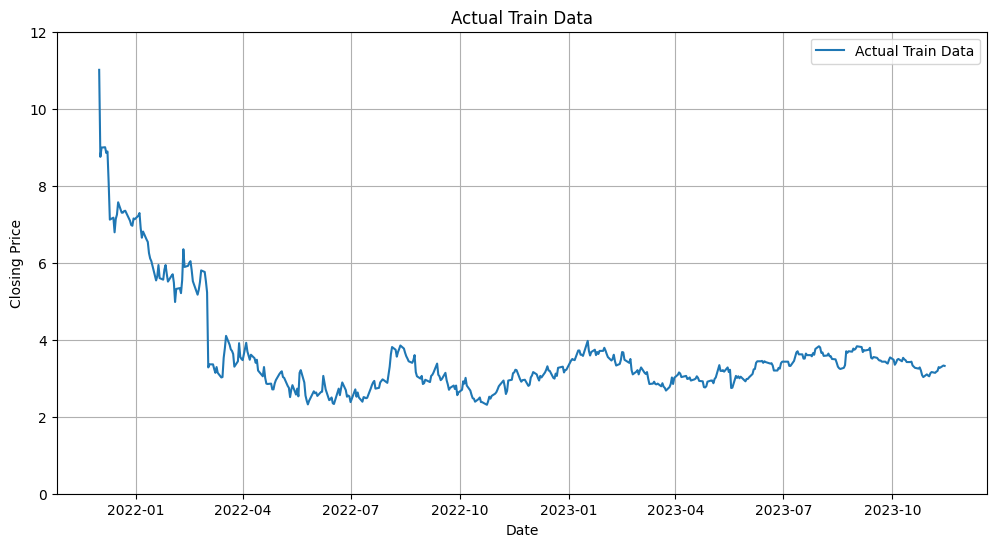

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

# Double exponential smoothing

## Add

In [202]:
# prompt: ใช้ Double exponential smoothing กับ train_df['Close']

from statsmodels.tsa.holtwinters import ExponentialSmoothing

des_model = ExponentialSmoothing(train_data['Close'], trend='add').fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(des_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             21.621
Optimized:                         True   AIC                          -1529.405
Trend:                         Additive   BIC                          -1512.611
Seasonal:                          None   AICC                         -1529.232
Seasonal Periods:                  None   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:16
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9831625                alpha                 True
smoothing_trend            0.01730

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [203]:
# ใช้ตัวแบบทำนายข้อมูลชุด test

start = len(train_data)
end = len(train_data) + len(test_data) - 1

des_pred_add = des_model_add.forecast(len(test_data))
print('Double Exponential Smoothing Predictions:')
des_pred_add

Double Exponential Smoothing Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.319327
493,3.318515
494,3.317703
495,3.316891
496,3.316078
...,...
610,3.223481
611,3.222668
612,3.221856
613,3.221044


### RMSE, MAE และ MAPE of test data

In [204]:
# Calculate RMSE for the test set
rmse_des = np.sqrt(mean_squared_error(test_data['Close'], des_pred))
print("RMSE of DES:", rmse_des)

RMSE of DES: 0.18032551922932727


In [205]:
# Calculate MAE for the test set
mae_des = mean_absolute_error(test_data['Close'], des_pred)
print("MAE of DES:", mae_des)

MAE of DES: 0.15782529460305975


In [206]:
# Calculate MAPE for the test set
mape_des = mean_absolute_percentage_error(test_data['Close'], des_pred)
print("MAPE of DES:", mape_des)
print(", " + str(mape_des*100) + "%")

MAPE of DES: 0.04967874592201434
, 4.967874592201435%


### Predict and Actual Comparison Graph Display

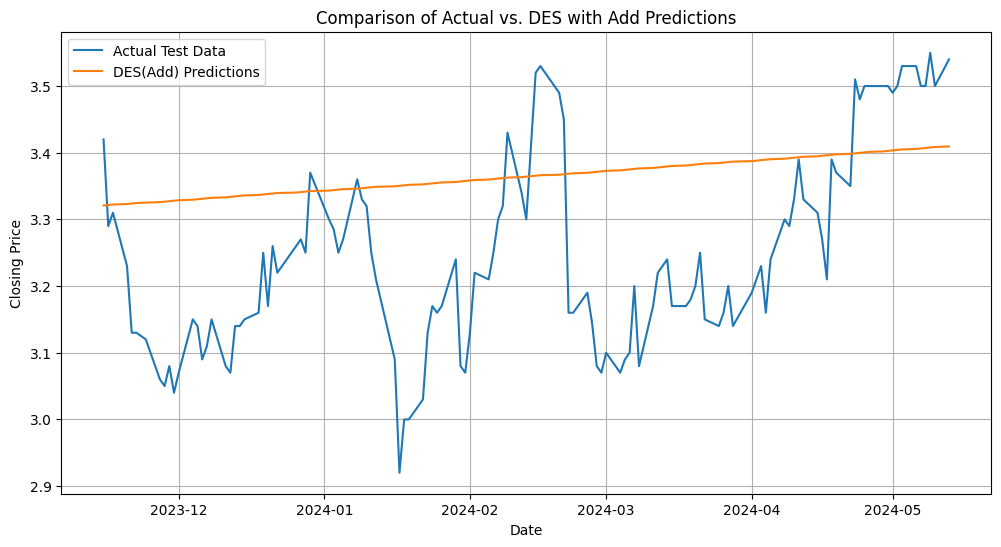

In [207]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, des_pred, label='DES(Add) Predictions')
plt.title('Comparison of Actual vs. DES with Add Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

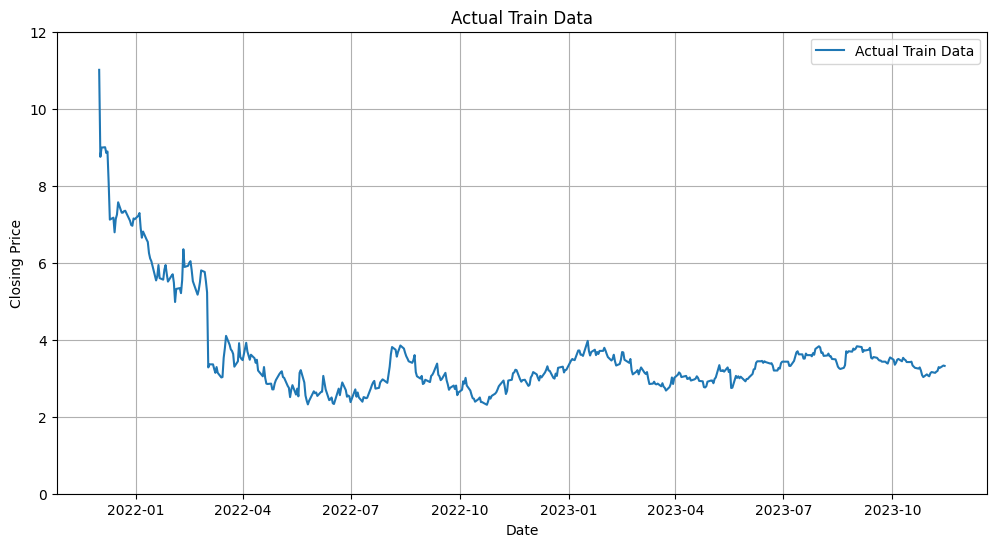

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

## Mul

In [209]:
# prompt: ใช้ Double exponential smoothing กับ train_df['Close']

from statsmodels.tsa.holtwinters import ExponentialSmoothing

des_model = ExponentialSmoothing(train_data['Close'], trend='mul').fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(des_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             20.713
Optimized:                         True   AIC                          -1550.516
Trend:                   Multiplicative   BIC                          -1533.723
Seasonal:                          None   AICC                         -1550.343
Seasonal Periods:                  None   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:17
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9825642                alpha                 True
smoothing_trend            0.01102

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [210]:
# ใช้ตัวแบบทำนายข้อมูลชุด test

start = len(train_data)
end = len(train_data) + len(test_data) - 1

des_pred_mul = des_model_mul.forecast(len(test_data))
print('Double Exponential Smoothing Predictions:')
des_pred_mul

Double Exponential Smoothing Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.320886
493,3.321602
494,3.322318
495,3.323033
496,3.323750
...,...
610,3.406404
611,3.407138
612,3.407872
613,3.408607


### RMSE, MAE และ MAPE of test data

In [211]:
# Calculate RMSE for the test set
rmse_des = np.sqrt(mean_squared_error(test_data['Close'], des_pred))
print("RMSE of DES:", rmse_des)

RMSE of DES: 0.18032551922932727


In [212]:
# Calculate MAE for the test set
mae_des = mean_absolute_error(test_data['Close'], des_pred)
print("MAE of DES:", mae_des)

MAE of DES: 0.15782529460305975


In [213]:
# Calculate MAPE for the test set
mape_des = mean_absolute_percentage_error(test_data['Close'], des_pred)
print("MAPE of DES:", mape_des)
print(", " + str(mape_des*100) + "%")

MAPE of DES: 0.04967874592201434
, 4.967874592201435%


### Predict and Actual Comparison Graph Display

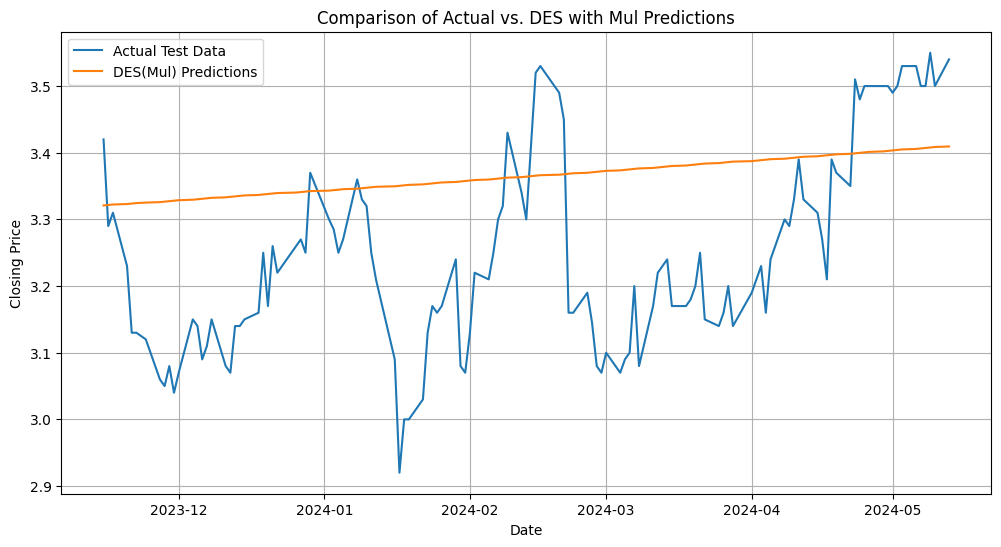

In [214]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, des_pred, label='DES(Mul) Predictions')
plt.title('Comparison of Actual vs. DES with Mul Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

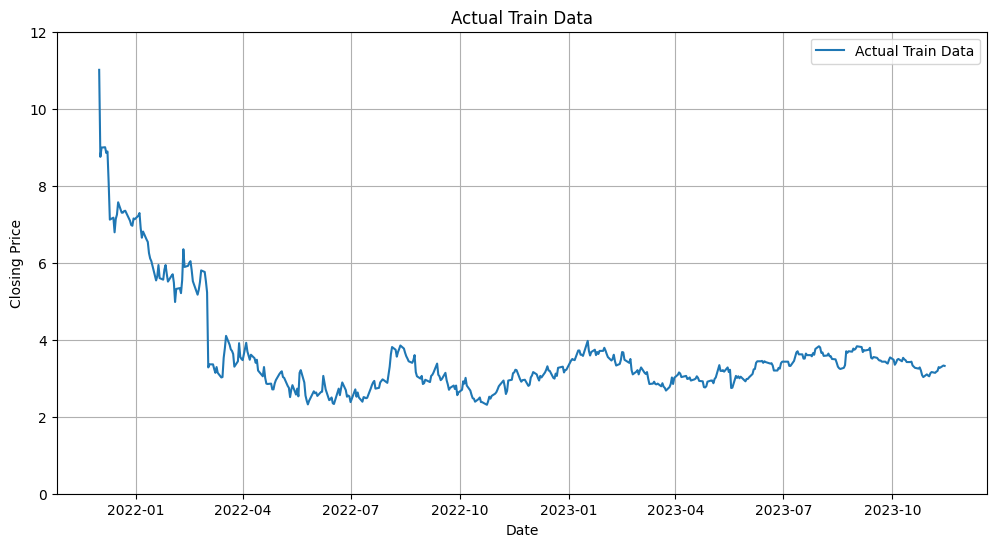

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

# Holt Winter

## trend ="add", seasonal = "add"

In [216]:
model_hw_add_add = ExponentialSmoothing(train_data['Close'],
                                    trend ="add",
                                    seasonal = "add",
                                    seasonal_periods=12)

fit_model_hw_add_add = model_hw_add_add.fit()

predictions_hw_add_add = fit_model_hw_add_add.forecast(len(test_data))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [217]:
print(fit_model_hw_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             21.461
Optimized:                         True   AIC                          -1509.058
Trend:                         Additive   BIC                          -1441.882
Seasonal:                      Additive   AICC                         -1507.612
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [218]:
rmse_hw_add_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_add))
print(f"\nRMSE of hw_add_add: {rmse_hw_add_add}")


RMSE of hw_add_add: 1.1215509797966348


In [219]:
mae_hw_add_add = mean_absolute_error(test_data["Close"], predictions_hw_add_add)
print(f"MAE of hw_add_add: {mae_hw_add_add}")

MAE of hw_add_add: 0.9268510357713013


In [220]:
mape_hw_add_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_add)*100
print(f"MAPE of hw_add_add: {mape_hw_add_add}%")

MAPE of hw_add_add: 28.041876904110218%


In [221]:
hw_add_add_pred = fit_model_hw_add_add.forecast(len(test_data))
print('Holt Winter with add trend and add seasonal Predictions:')
hw_add_add_pred

Holt Winter with add trend and add seasonal Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.316754
493,3.298960
494,3.302746
495,3.242630
496,3.199453
...,...
610,1.445351
611,1.443646
612,1.440399
613,1.422606


### Predict and Actual Comparison Graph Display

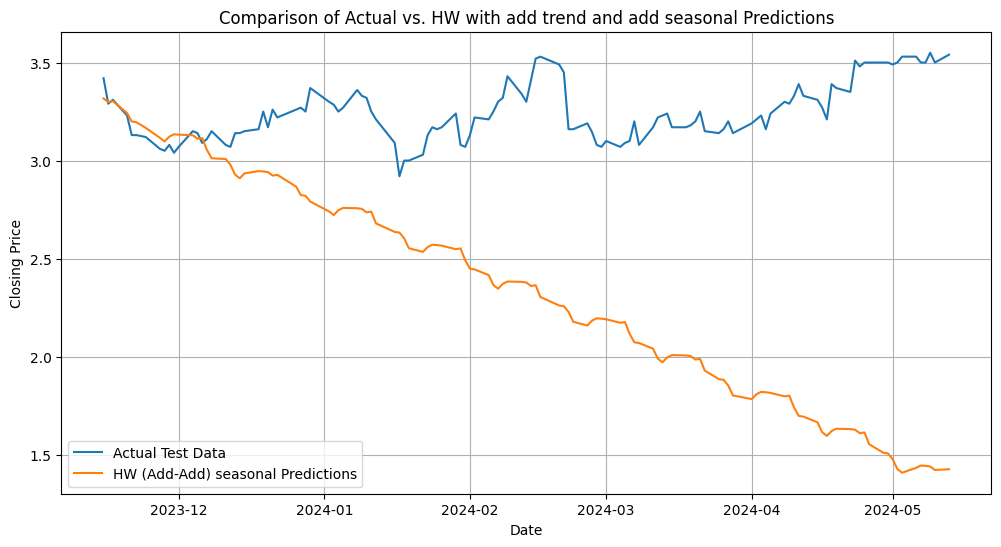

In [222]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_add_add_pred, label='HW (Add-Add) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with add trend and add seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="add", seasonal = "mul"

In [223]:
model_hw_add_mul = ExponentialSmoothing(train_data['Close'],
                                    trend ="add",
                                    seasonal = "mul",
                                    seasonal_periods=12)

fit_model_hw_add_mul = model_hw_add_mul.fit()

predictions_hw_add_mul = fit_model_hw_add_mul.forecast(len(test_data))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [224]:
print(fit_model_hw_add_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             20.344
Optimized:                         True   AIC                          -1535.363
Trend:                         Additive   BIC                          -1468.187
Seasonal:                Multiplicative   AICC                         -1533.917
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9200628                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [225]:
rmse_hw_add_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_mul))
print(f"\nRMSE of hw_add_mul: {rmse_hw_add_mul}")


RMSE of hw_add_mul: 0.168824087064733


In [226]:
mae_hw_add_mul = mean_absolute_error(test_data["Close"], predictions_hw_add_mul)
print(f"MAE of hw_add_mul: {mae_hw_add_mul}")

MAE of hw_add_mul: 0.1445423713161553


In [227]:
mape_hw_add_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_mul)*100
print(f"MAPE of hw_add_mul: {mape_hw_add_mul}%")

MAPE of hw_add_mul: 4.49322321219426%


In [228]:
hw_add_mul_pred = fit_model_hw_add_mul.forecast(len(test_data))
print('Holt Winter with add trend and mul seasonal Predictions Predictions:')
hw_add_mul_pred

Holt Winter with add trend and mul seasonal Predictions Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.345413
493,3.398641
494,3.408863
495,3.379149
496,3.332437
...,...
610,3.230850
611,3.263330
612,3.284920
613,3.337176


### Predict and Actual Comparison Graph Display

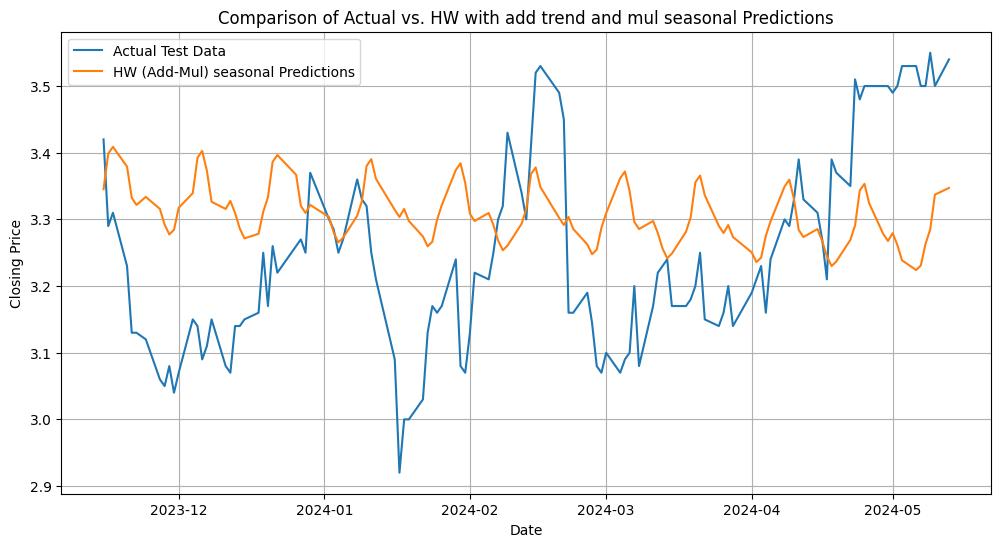

In [229]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_add_mul_pred, label='HW (Add-Mul) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with add trend and mul seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="mul", seasonal = "add"

In [177]:
model_hw_mul_add = ExponentialSmoothing(train_data['Close'],
                                    trend ="mul",
                                    seasonal = "add",
                                    seasonal_periods=12)

fit_model_hw_mul_add = model_hw_mul_add.fit()

predictions_hw_mul_add = fit_model_hw_mul_add.forecast(len(test_data))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [230]:
print(fit_model_hw_mul_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             19.608
Optimized:                         True   AIC                          -1553.483
Trend:                   Multiplicative   BIC                          -1486.307
Seasonal:                      Additive   AICC                         -1552.037
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:19
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [231]:
rmse_hw_mul_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_add))
print(f"\nRMSE of hw_mul_add: {rmse_hw_mul_add}")


RMSE of hw_mul_add: 0.15810288294939825


In [232]:
mae_hw_mul_add = mean_absolute_error(test_data["Close"], predictions_hw_mul_add)
print(f"MAE of hw_mul_add: {mae_hw_mul_add}")

MAE of hw_mul_add: 0.1258165446075572


In [233]:
mape_hw_mul_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_add)*100
print(f"MAPE of hw_mul_add: {mape_hw_mul_add}%")

MAPE of hw_mul_add: 3.8244340605192813%


In [234]:
hw_mul_add_pred = fit_model_hw_mul_add.forecast(len(test_data))
print('Holt Winter with mul trend and add seasonal Predictions Predictions:')
hw_mul_add_pred

Holt Winter with mul trend and add seasonal Predictions Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.329908
493,3.329138
494,3.349018
495,3.301456
496,3.272027
...,...
610,3.201022
611,3.211686
612,3.225771
613,3.229018


### Predict and Actual Comparison Graph Display

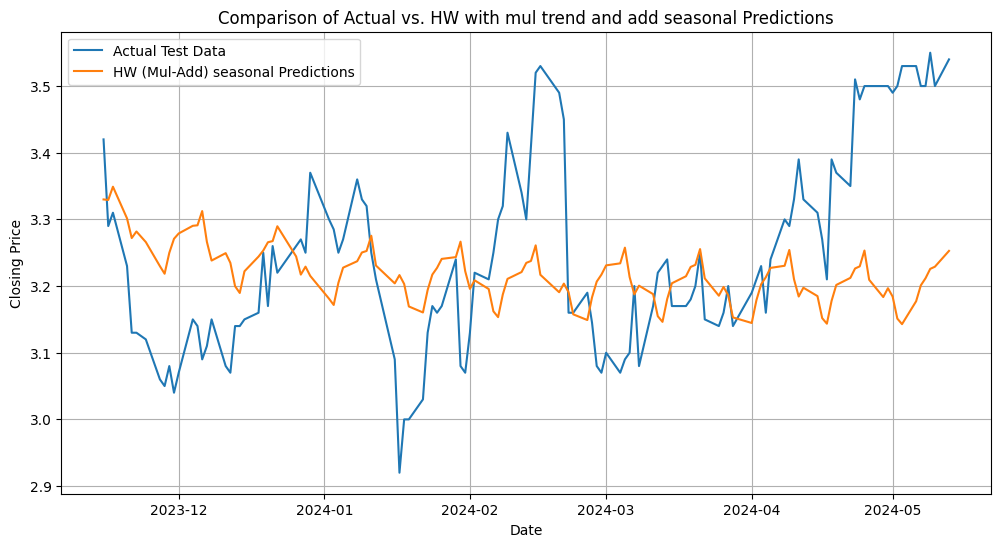

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_mul_add_pred, label='HW (Mul-Add) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with mul trend and add seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="mul", seasonal = "mul"

In [236]:
model_hw_mul_mul = ExponentialSmoothing(train_data['Close'],
                                    trend ="mul",
                                    seasonal = "mul",
                                    seasonal_periods=12)

fit_model_hw_mul_mul = model_hw_mul_mul.fit()

predictions_hw_mul_mul = fit_model_hw_mul_mul.forecast(len(test_data))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [237]:
print(fit_model_hw_mul_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             19.611
Optimized:                         True   AIC                          -1553.423
Trend:                   Multiplicative   BIC                          -1486.248
Seasonal:                Multiplicative   AICC                         -1551.977
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         15:00:20
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9202870                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [238]:
rmse_hw_mul_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_mul))
print(f"\nRMSE of hw_mul_mul: {rmse_hw_mul_mul}")


RMSE of hw_mul_mul: 0.1779624095984177


In [239]:
mae_hw_mul_mul = mean_absolute_error(test_data["Close"], predictions_hw_mul_mul)
print(f"MAE of hw_mul_mul: {mae_hw_mul_mul}")

MAE of hw_mul_mul: 0.1551315438727749


In [240]:
mape_hw_mul_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_mul)*100
print(f"MAPE of hw_mul_mul: {mape_hw_mul_mul}%")

MAPE of hw_mul_mul: 4.872044292932253%


In [241]:
hw_mul_mul_pred = fit_model_hw_mul_mul.forecast(len(test_data))
print('Holt Winter with mul trend and mul seasonal Predictions Predictions:')
hw_mul_mul_pred

Holt Winter with mul trend and mul seasonal Predictions Predictions:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
492,3.345310
493,3.395014
494,3.401438
495,3.371493
496,3.327838
...,...
610,3.327945
611,3.362220
612,3.384345
613,3.434629


### Predict and Actual Comparison Graph Display

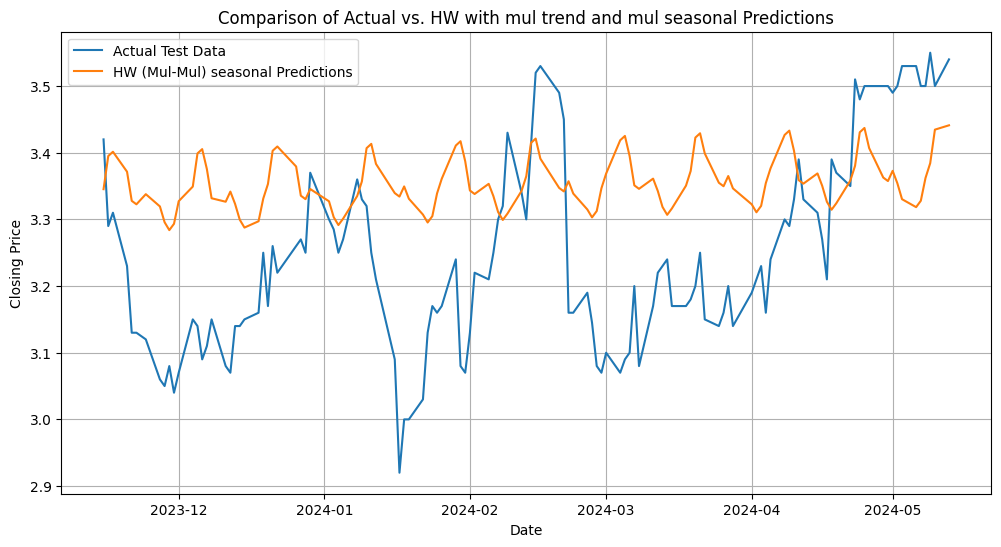

In [242]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_mul_mul_pred, label='HW (Mul-Mul) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with mul trend and mul seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [243]:
# Calculate all metrics in one cell
rmse_ses = np.sqrt(mean_squared_error(test_data["Close"], predictions_ses))
mae_ses = mean_absolute_error(test_data["Close"], predictions_ses)
mape_ses = mean_absolute_percentage_error(test_data["Close"], predictions_ses) * 100

rmse_des_add = np.sqrt(mean_squared_error(test_data['Close'], des_pred_add))
mae_des_add = mean_absolute_error(test_data['Close'], des_pred_add)
mape_des_add = mean_absolute_percentage_error(test_data['Close'], des_pred_add) * 100

rmse_des_mul = np.sqrt(mean_squared_error(test_data['Close'], des_pred_mul))
mae_des_mul = mean_absolute_error(test_data['Close'], des_pred_mul)
mape_des_mul = mean_absolute_percentage_error(test_data['Close'], des_pred_mul) * 100

rmse_hw_add_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_add))
mae_hw_add_add = mean_absolute_error(test_data["Close"], predictions_hw_add_add)
mape_hw_add_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_add) * 100

rmse_hw_add_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_mul))
mae_hw_add_mul = mean_absolute_error(test_data["Close"], predictions_hw_add_mul)
mape_hw_add_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_mul) * 100

rmse_hw_mul_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_add))
mae_hw_mul_add = mean_absolute_error(test_data["Close"], predictions_hw_mul_add)
mape_hw_mul_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_add) * 100

rmse_hw_mul_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_mul))
mae_hw_mul_mul = mean_absolute_error(test_data["Close"], predictions_hw_mul_mul)
mape_hw_mul_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_mul) * 100

# Create a dictionary to store the results
results = {
    'Model': ['Simple Exponential Smoothing',
              'Double Exponential Smoothing (Add)',
              'Double Exponential Smoothing (Mul)',
              'Holt-Winters (Add-Add)',
              'Holt-Winters (Add-Mul)',
              'Holt-Winters (Mul-Add)',
              'Holt-Winters (Mul-Mul)'],
    'RMSE': [rmse_ses,
             rmse_des_add,
             rmse_des_mul,
             rmse_hw_add_add,
             rmse_hw_add_mul,
             rmse_hw_mul_add,
             rmse_hw_mul_mul],
    'MAE': [mae_ses,
            mae_des_add,
            mae_des_mul,
            mae_hw_add_add,
            mae_hw_add_mul,
            mae_hw_mul_add,
            mae_hw_mul_mul],
    'MAPE (%)': [mape_ses,
                 mape_des_add,
                 mape_des_mul,
                 mape_hw_add_add,
                 mape_hw_add_mul,
                 mape_hw_mul_add,
                 mape_hw_mul_mul]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the results table
results_df


,Model,RMSE,MAE,MAPE (%)
0,Simple Exponential Smoothing,0.164637,0.143089,4.466947
1,Double Exponential Smoothing (Add),0.165545,0.137012,4.220174
2,Double Exponential Smoothing (Mul),0.180326,0.157825,4.967875
3,Holt-Winters (Add-Add),1.121551,0.926851,28.041877
4,Holt-Winters (Add-Mul),0.168824,0.144542,4.493223
5,Holt-Winters (Mul-Add),0.158103,0.125817,3.824434
6,Holt-Winters (Mul-Mul),0.177962,0.155132,4.872044
